EII4220 - Relación entre Diversificación de Exportaciones y Crecimiento Económico para los países - Tercera entrega del proyecto semestral




Esquivel Liam 21151821-9, Fernandez Bastián 21139593-1, Franco José 20784251-6



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Utilizamos un conjunto de datos históricos que abarca el período 1962-2022, enfocado en indicadores macroeconómicos como el valor de las exportaciones, la diversidad de productos exportados y métricas de complejidad económica, tales como el Economic Complexity Index (ECI) y el Product Complexity Index (PCI). Con esta base de datos nos planteamos la hipotesis de que una mayor diversificación de exportaciones está positivamente relacionada con un aumento en el volumen total de exportaciones, particularmente en economías pequeñas y medianas.. A partir del análisis descriptivo de la base de datos de comercio internacional de 2019, decidimos ampliar la cantidad de años considerados y realizar ciertas operaciones en las columnas, como eliminar los datos que no superaran un valor específico. Esto se determinó siguiendo los criterios del paper Economic complexity theory and applications de César A. Hidalgo en el cual basamos nuestro estudio, con el objetivo de reducir el ruido en los datos. Además, orientamos nuestra investigación únicamente a ciertos países que cumplieran con los requisitos de confiabilidad y una amplia disponibilidad de datos históricos.


In [ ]:
!pip install pandas openpyxl
from google.colab import files
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_stata('/content/drive/MyDrive/data/data_combined.dta')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7930789 entries, 0 to 7930788
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   level_0       int32  
 1   index         int32  
 2   country_id    int32  
 3   year          int16  
 4   product_id    int16  
 5   total_export  float64
 6   eci           float32
 7   pci           float32
dtypes: float32(2), float64(1), int16(2), int32(3)
memory usage: 242.0 MB


Resumen estadístico para toda la columna total_export:
count    7.930789e+06
mean     5.312293e+07
std      1.001644e+09
min      0.000000e+00
25%      0.000000e+00
50%      1.604600e+04
75%      1.058644e+06
max      3.716792e+11
Name: total_export, dtype: float64

Coeficiente de variación: 1885.52%


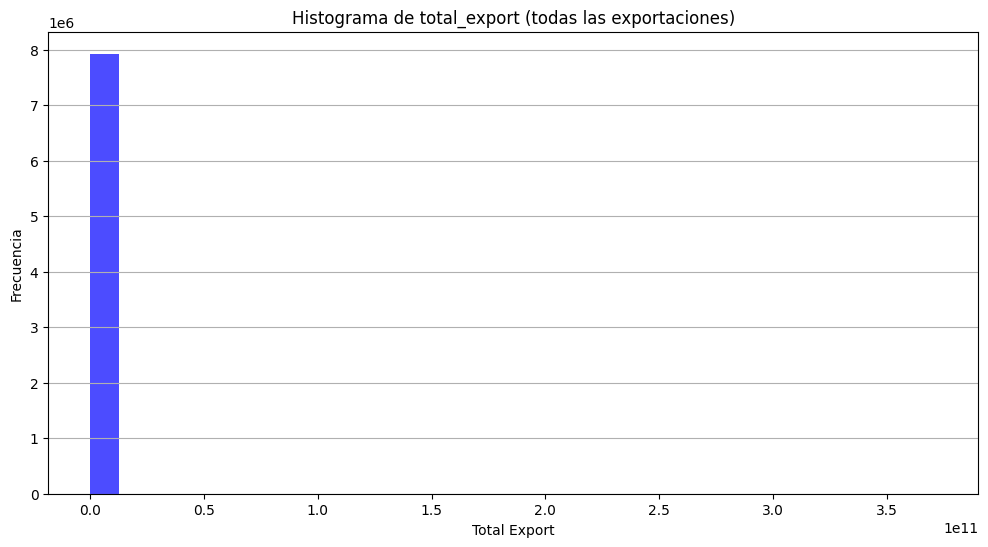


Resumen estadístico para total_export > 500.000.000:
count    1.245100e+05
mean     2.691352e+09
std      7.530237e+09
min      5.000033e+08
25%      6.988647e+08
50%      1.083878e+09
75%      2.121314e+09
max      3.716792e+11
Name: total_export, dtype: float64

Coeficiente de variación: 279.79%


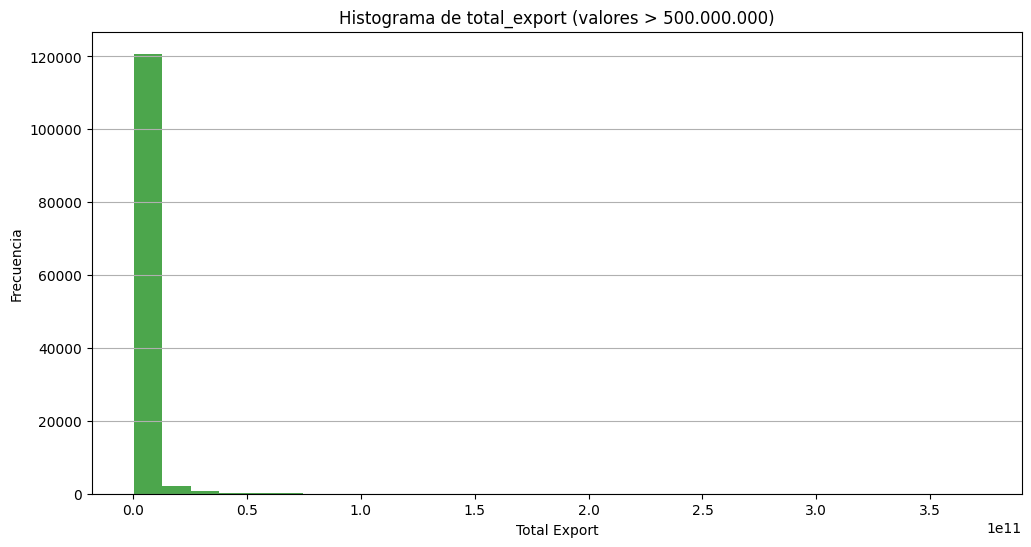

In [ ]:
summary_all = df1['total_export'].describe()


mean_all = df1['total_export'].mean()
std_all = df1['total_export'].std()
cv_all = std_all / mean_all if mean_all != 0 else 0


print("Resumen estadístico para toda la columna total_export:")
print(summary_all)
print(f"\nCoeficiente de variación: {cv_all:.2%}")


plt.figure(figsize=(12, 6))
plt.hist(df1['total_export'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de total_export (todas las exportaciones)')
plt.xlabel('Total Export')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()


filtered_df = df1[df1['total_export'] > 500_000_000]
summary_filtered = filtered_df['total_export'].describe()


mean_filtered = filtered_df['total_export'].mean()
std_filtered = filtered_df['total_export'].std()
cv_filtered = std_filtered / mean_filtered if mean_filtered != 0 else 0


print("\nResumen estadístico para total_export > 500.000.000:")
print(summary_filtered)
print(f"\nCoeficiente de variación: {cv_filtered:.2%}")


plt.figure(figsize=(12, 6))
plt.hist(filtered_df['total_export'], bins=30, color='green', alpha=0.7)
plt.title('Histograma de total_export (valores > 500.000.000)')
plt.xlabel('Total Export')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

Acá se presenta la comparación de los datos con filtro y sin filtro


In [ ]:

df_filtered = df1[df1['total_export'] > 500_000_000]

vol_product_table = df_filtered.groupby(['product_id', 'year'])['total_export'].sum().reset_index()
vol_product_table.rename(columns={'total_export': 'vol_product'}, inplace=True)


vol_country_table = df_filtered.groupby(['country_id', 'year'])['total_export'].sum().reset_index()
vol_country_table.rename(columns={'total_export': 'vol_country'}, inplace=True)


vol_total_table = df_filtered.groupby(['year'])['total_export'].sum().reset_index()
vol_total_table.rename(columns={'total_export': 'vol_total'}, inplace=True)


df_alternativo = pd.merge(df_filtered, vol_product_table, on=['product_id', 'year'], how='left')
df_alternativo = pd.merge(df_alternativo, vol_country_table, on=['country_id', 'year'], how='left')
df_alternativo = pd.merge(df_alternativo, vol_total_table, on=['year'], how='left')


df_alternativo = df_alternativo[['country_id', 'year', 'product_id', 'total_export', 'vol_product', 'vol_country', 'vol_total']]


print(df_alternativo)

        country_id  year  product_id  total_export   vol_product  \
0               36  1962         809  6.406079e+08  6.406079e+08   
1               36  1963         809  8.174431e+08  8.174431e+08   
2               36  1964         809  8.769388e+08  8.769388e+08   
3               36  1965         809  7.589198e+08  7.589198e+08   
4               36  1966         809  7.856736e+08  7.856736e+08   
...            ...   ...         ...           ...           ...   
124505         999  2022        1384  1.605834e+09  5.594453e+10   
124506         999  2022        1392  6.123564e+09  1.944961e+10   
124507         999  2022        1422  1.088880e+09  6.312539e+10   
124508         999  2022        1432  1.611486e+11  1.107678e+12   
124509         999  2022        1436  1.824261e+09  5.286893e+11   

         vol_country     vol_total  
0       6.406079e+08  9.611578e+09  
1       8.174431e+08  1.379040e+10  
2       8.769388e+08  1.468430e+10  
3       7.589198e+08  1.634972e+10 

Esta es el data frame generado a partir de operaciones, de agregación.
-Total export es el valor total de las exportaciónes que genero el país del producto especifico.
-Vol_product es el volumen total del producto.
-Vol_country es todo el volumen que produce el país.
-Vol_total es todo el volumen que produce el país en un tiempo específico.

In [ ]:
df_alternativo['Diversity_ratio'] = (
    df_alternativo['total_export'] * df_alternativo['vol_total'] /
    (df_alternativo['vol_country'] * df_alternativo['vol_product'])
)


df_alternativo['t_value'] = (df_alternativo['Diversity_ratio'] > 1).astype(int)


df_resultado = df_alternativo[['country_id', 'year', 'product_id', 'Diversity_ratio', 't_value', 'vol_country']]


print(df_resultado)

        country_id  year  product_id  Diversity_ratio  t_value   vol_country
0               36  1962         809        15.003839        1  6.406079e+08
1               36  1963         809        16.870159        1  8.174431e+08
2               36  1964         809        16.744954        1  8.769388e+08
3               36  1965         809        21.543408        1  7.589198e+08
4               36  1966         809        26.103133        1  7.856736e+08
...            ...   ...         ...              ...      ...           ...
124505         999  2022        1384         2.427928        1  2.754791e+11
124506         999  2022        1392        26.630922        1  2.754791e+11
124507         999  2022        1422         1.459045        1  2.754791e+11
124508         999  2022        1432        12.305690        1  2.754791e+11
124509         999  2022        1436         0.291863        0  2.754791e+11

[124510 rows x 6 columns]


Por medio de operaciones en las columnas, se obtuvo el ratio de diversidad, un valor que puede alcanzar magnitudes muy grandes o muy pequeñas. Por esta razón, y siguiendo la recomendación del artículo en el cual basamos nuestro estudio, transformamos este valor en una variable binaria. El parámetro utilizado para establecer esta diferenciación fue definido en el mismo artículo.

In [ ]:
diversity_df = df_resultado.groupby(['country_id', 'year']).agg(
    diversity=('t_value', 'sum'),
    vol_total=('vol_country', 'first')
).reset_index()


diversity_df.rename(columns={'vol_total': 'vol_total'}, inplace=True)


print(diversity_df)

      country_id  year  diversity     vol_total
0              4  2019          1  7.741524e+08
1              8  2013          1  8.017507e+08
2              8  2018          1  1.677558e+09
3              8  2019          1  1.446254e+09
4              8  2020          1  1.058003e+09
...          ...   ...        ...           ...
5040         999  2018         14  1.100713e+11
5041         999  2019         15  1.482070e+11
5042         999  2020         16  1.226124e+11
5043         999  2021          9  2.102900e+11
5044         999  2022          9  2.754791e+11

[5045 rows x 4 columns]


En las líneas anteriores, logramos agregar los productos según país y año, obteniendo así el nivel de diversidad.

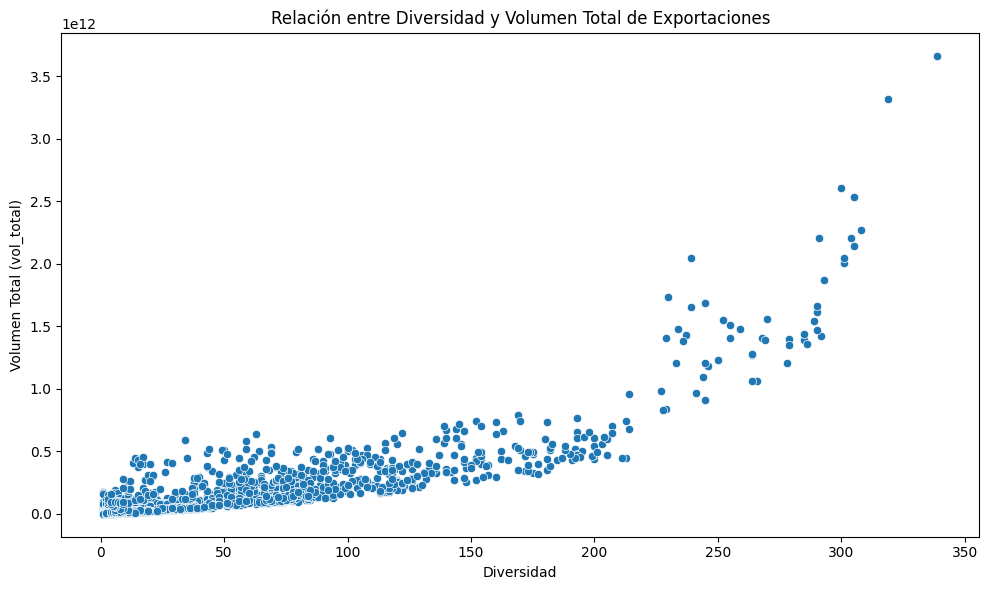

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Usar seaborn para crear el scatterplot
sns.scatterplot(x='diversity', y='vol_total', data=diversity_df)

# Configurar el gráfico
plt.title('Relación entre Diversidad y Volumen Total de Exportaciones')
plt.xlabel('Diversidad')
plt.ylabel('Volumen Total (vol_total)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El gráfico muestra la relación entre Volument total de exportaciónes con diversidad


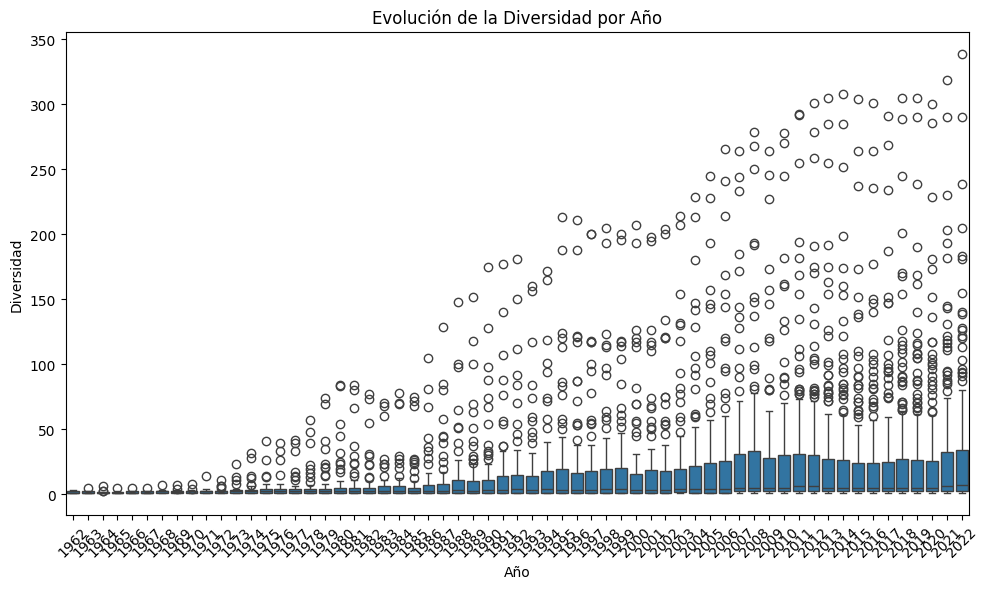

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='diversity', data=diversity_df)


plt.title('Evolución de la Diversidad por Año')
plt.xlabel('Año')
plt.ylabel('Diversidad')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

Este grafico lo hicimos con el fin de ver la evolución de la diversidad en el tiempo. Como se ve tiene gran contenido de outliers y distribuciones asimétricas.

In [ ]:
from ipywidgets import interact


summary = diversity_df['diversity'].describe()
mean_diversity = diversity_df['diversity'].mean()
std_diversity = diversity_df['diversity'].std()
cv_diversity = std_diversity / mean_diversity if mean_diversity != 0 else 0

print("Resumen estadístico para la columna diversity:")
print(summary)
print(f"\nCoeficiente de variación: {cv_diversity:.2%}")


def plot_histogram(year):
    filtered_data = diversity_df[diversity_df['year'] == year]
    plt.figure(figsize=(12, 6))
    plt.hist(filtered_data['diversity'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Histograma de Diversity para el año {year}')
    plt.xlabel('Diversity')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()


unique_years = diversity_df['year'].unique()
interact(plot_histogram, year=sorted(unique_years));

Resumen estadístico para la columna diversity:
count    5045.000000
mean       20.323092
std        42.292070
min         1.000000
25%         1.000000
50%         3.000000
75%        16.000000
max       339.000000
Name: diversity, dtype: float64

Coeficiente de variación: 208.10%


interactive(children=(Dropdown(description='year', options=(1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 19…

Este es un grafico con lista deplegable que permite analisar la distribución durante el año.

In [ ]:
countries_info = {
    840: ("Estados Unidos", "B"),
    156: ("China", "B"),
    392: ("Japón", "B"),
    276: ("Alemania", "B"),
    826: ("Reino Unido", "B"),
    76:  ("Brasil", "M"),
    36:  ("Australia", "M"),
    124: ("Canadá", "M"),
    152: ("Chile", "M"),
    484: ("México", "M"),
    56:  ("Bélgica", "S"),
    620: ("Portugal", "S"),
    554: ("Nueva Zelanda", "S"),
    372: ("Irlanda", "S"),
    578: ("Noruega", "S")
}


countries_df = pd.DataFrame.from_dict(countries_info, orient='index', columns=['country_name', 'size']).reset_index()
countries_df.rename(columns={'index': 'country_id'}, inplace=True)


filtered_diversity_df = diversity_df[diversity_df['country_id'].isin(countries_df['country_id'])]

result_df = pd.merge(filtered_diversity_df, countries_df, on='country_id', how='left')


result_df = result_df[['country_id', 'country_name', 'size', 'year', 'diversity', 'vol_total']]


print(result_df)

     country_id    country_name size  year  diversity     vol_total
0            36       Australia    M  1962          1  6.406079e+08
1            36       Australia    M  1963          1  8.174431e+08
2            36       Australia    M  1964          1  8.769388e+08
3            36       Australia    M  1965          1  7.589198e+08
4            36       Australia    M  1966          1  7.856736e+08
..          ...             ...  ...   ...        ...           ...
788         840  Estados Unidos    B  2018        245  1.685819e+12
789         840  Estados Unidos    B  2019        239  1.650703e+12
790         840  Estados Unidos    B  2020        229  1.409741e+12
791         840  Estados Unidos    B  2021        230  1.733528e+12
792         840  Estados Unidos    B  2022        239  2.047181e+12

[793 rows x 6 columns]


A continuación, seleccionamos 15 países, con base en la confiabilidad y la data histórica. Posteriormente, realizamos los análisis correspondientes, clasificando estos países en tres categorías según sus niveles de ingresos: altos, medios y bajos (B, M, S).

A continuación el analisis descriptivo de la data frame generada

In [ ]:
data = pd.read_stata('/content/drive/MyDrive/basededatosaños/result_df.dta')

In [ ]:
data.head()

,index,country_id,country_name,size,year,diversity,vol_total
0,0,36,Australia,M,1962,1,640607940.0
1,1,36,Australia,M,1963,1,817443147.0
2,2,36,Australia,M,1964,1,876938763.0
3,3,36,Australia,M,1965,1,758919811.0
4,4,36,Australia,M,1966,1,785673553.0


In [ ]:

summary_stats = data.drop(['country_id', 'index'], axis=1).describe()

categorical_summary = data.describe(include=['object'])

print("Resumen estadístico de las variables numéricas:")
print(summary_stats)

print("\nResumen de las variables categóricas:")
print(categorical_summary)

Resumen estadístico de las variables numéricas:
              year   diversity     vol_total
count   793.000000  793.000000  7.930000e+02
mean   1995.428752   57.906683  2.238699e+11
std      16.273709   74.904932  4.304442e+11
min    1962.000000    1.000000  5.020754e+08
25%    1983.000000    7.000000  8.390681e+09
50%    1996.000000   23.000000  5.061012e+10
75%    2009.000000   85.000000  2.379094e+11
max    2022.000000  339.000000  3.663918e+12

Resumen de las variables categóricas:
       country_name size
count           793  793
unique           15    3
top       Australia    B
freq             61  288


Acá se presenta el resumen estadístico de las variables numéricas. Este resumen muestra que los datos abarcan diversos años y países, con una amplia variabilidad en las exportaciones y la diversificación. Los países con mayores exportaciones están mejor representados, lo que podría influir en los análisis. Esta variabilidad destaca la importancia de examinar en profundidad las relaciones entre exportaciones y diversificación para validar la hipótesis del proyecto.


Correlación entre 'diversity' y 'vol_total':
           diversity  vol_total
diversity   1.000000   0.900508
vol_total   0.900508   1.000000


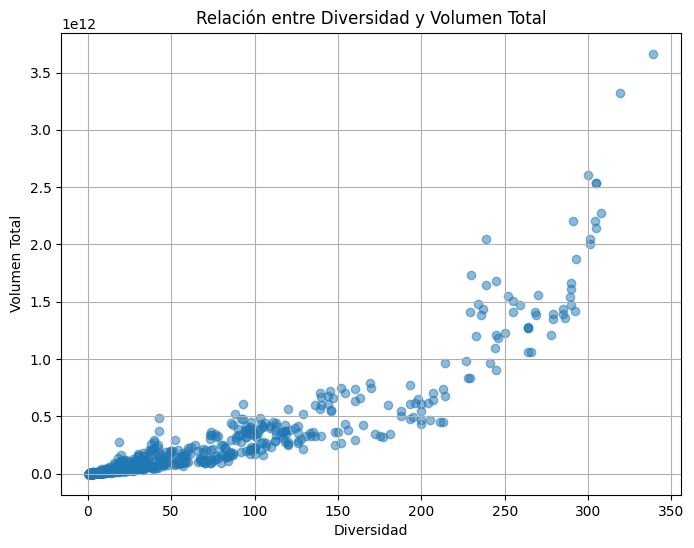

In [ ]:

diversity_vol_corr = data[['diversity', 'vol_total']].corr()
print("\nCorrelación entre 'diversity' y 'vol_total':")
print(diversity_vol_corr)

plt.figure(figsize=(8, 6))
plt.scatter(data['diversity'], data['vol_total'], alpha=0.5)
plt.title("Relación entre Diversidad y Volumen Total")
plt.xlabel("Diversidad")
plt.ylabel("Volumen Total")
plt.grid(True)
plt.show()

El gráfico muestra, la relación entre la diversificación de exportaciones y el volumen total de exportaciones entre los 15 países en estudio.

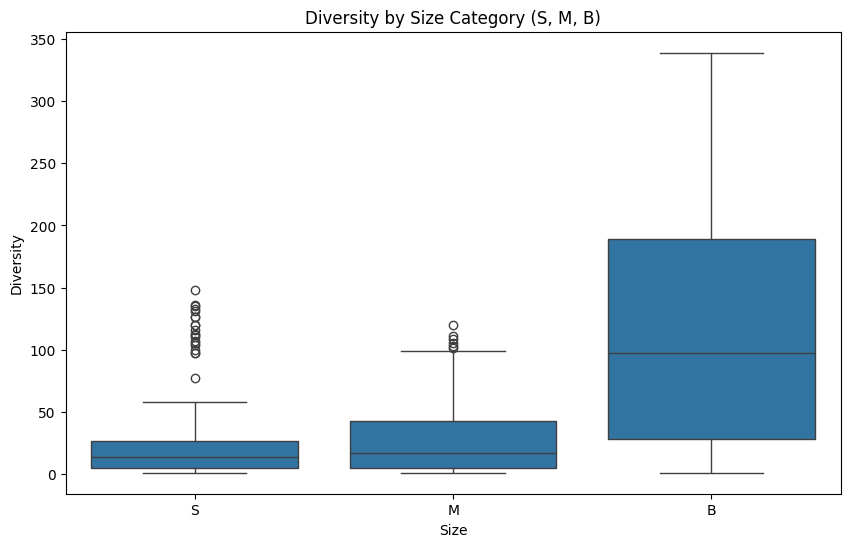

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='size', y='diversity', data=data, order=['S', 'M', 'B'])

plt.xlabel("Size")
plt.ylabel("Diversity")
plt.title("Diversity by Size Category (S, M, B)")
plt.show()

Realizaremos 3 regresiónes lineales independientes, una para cada categoría de tamaño económico (Size, Medium, Big). Esta decisión se justifica en la hipótesis de que la diversidad puede afectar de diferente manera a cada tipo de tamaño, como se muestra en la gráfica boxplot.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


sizes = ['S', 'M', 'B']
models = {}
results = {}

for size in sizes:

    data_filtered = data[data['size'] == size]


    X = data_filtered[['diversity']]
    y = data_filtered['vol_total']


    model = LinearRegression()
    model.fit(X, y)


    predictions = model.predict(X)

    models[size] = model
    results[size] = {
        'MSE': mean_squared_error(y, predictions),
        'R^2': r2_score(y, predictions),
        'Intercept': model.intercept_,
        'Coefficient': model.coef_[0]
    }

    print(f"Resultados para size = {size}:")
    print(f" - Intercepto: {model.intercept_}")
    print(f" - Coeficiente (diversity): {model.coef_[0]}")
    print(f" - MSE: {results[size]['MSE']}")
    print(f" - R^2: {results[size]['R^2']}\n")

Resultados para size = S:
 - Intercepto: -139378382.07369232
 - Coeficiente (diversity): 2552451371.5823617
 - MSE: 1.1600790119720286e+21
 - R^2: 0.8459076045985572

Resultados para size = M:
 - Intercepto: -19730303695.309494
 - Coeficiente (diversity): 4169204058.8447604
 - MSE: 2.1590034571035049e+21
 - R^2: 0.8692525684451775

Resultados para size = B:
 - Intercepto: -192420685019.80182
 - Coeficiente (diversity): 5866141881.59457
 - MSE: 8.060938440177279e+22
 - R^2: 0.7914588554593658



Se presentan las regresiones lineales, donde se ve que en economías pequeñas, el modelo explica el 84.59% de la variabilidad en las exportaciones (R² = 0.8459), destacando la diversificación como un factor clave. Para economías medianas, el ajuste mejora a un 86.93% (R² = 0.8693), reforzando su importancia. En economías grandes, el R² disminuye a 79.15%, reflejando menor ajuste debido a la influencia de factores adicionales más complejos en estos mercados. Los coeficientes de diversificación aumentan con el tamaño económico, alineados con el mayor volumen de exportaciones.

Luego de realizar la regresión lineal, generamos gráficos de diagnósticos para cada grupo.


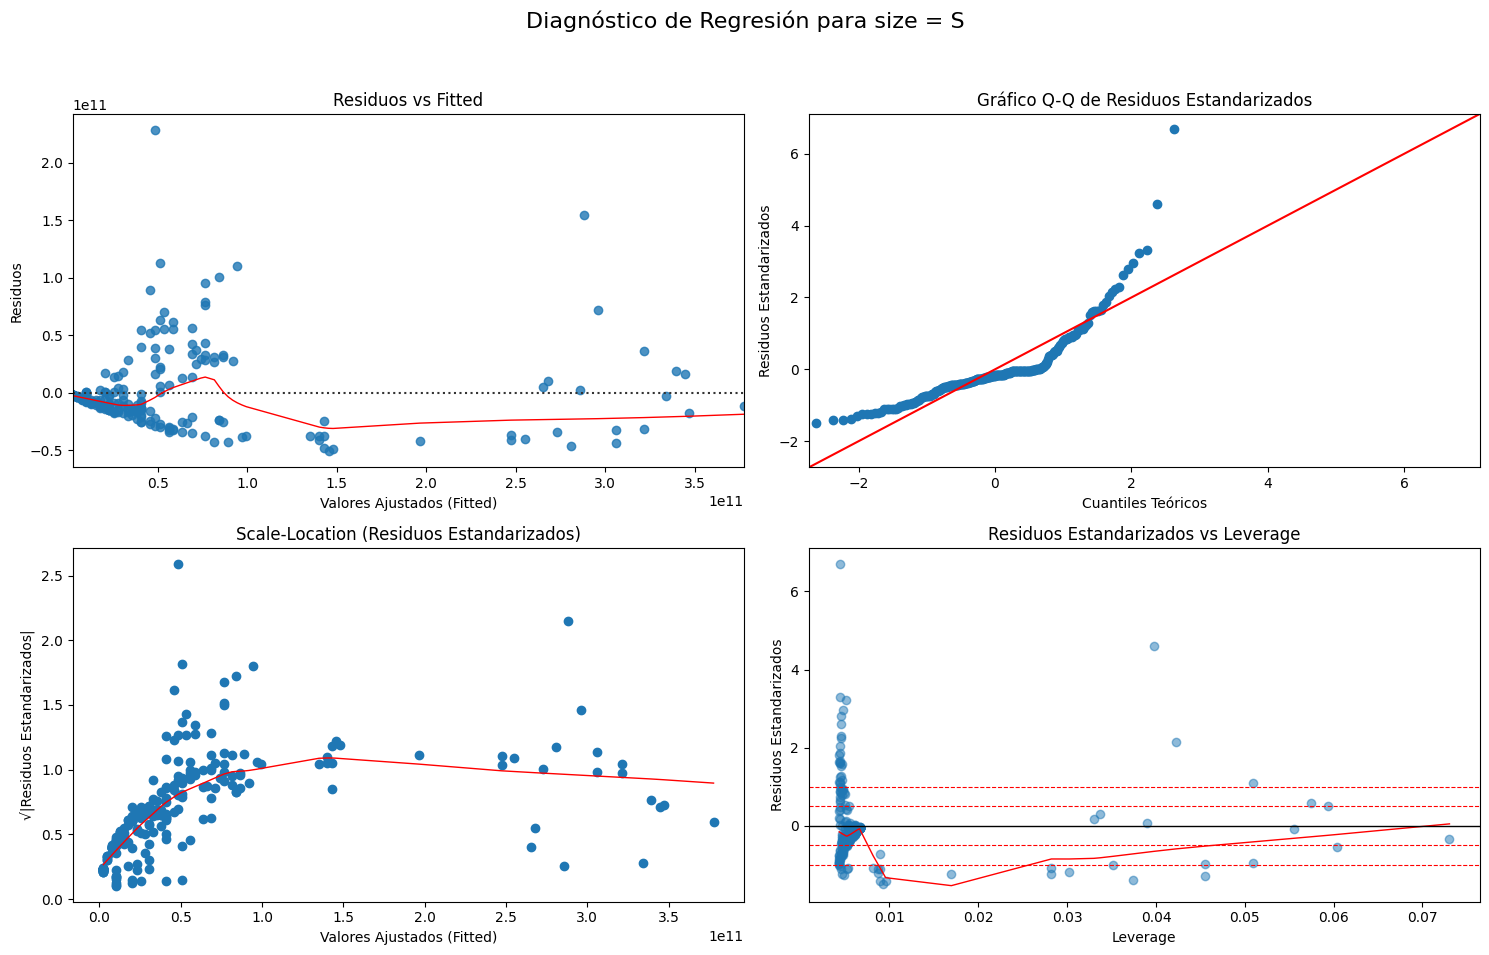

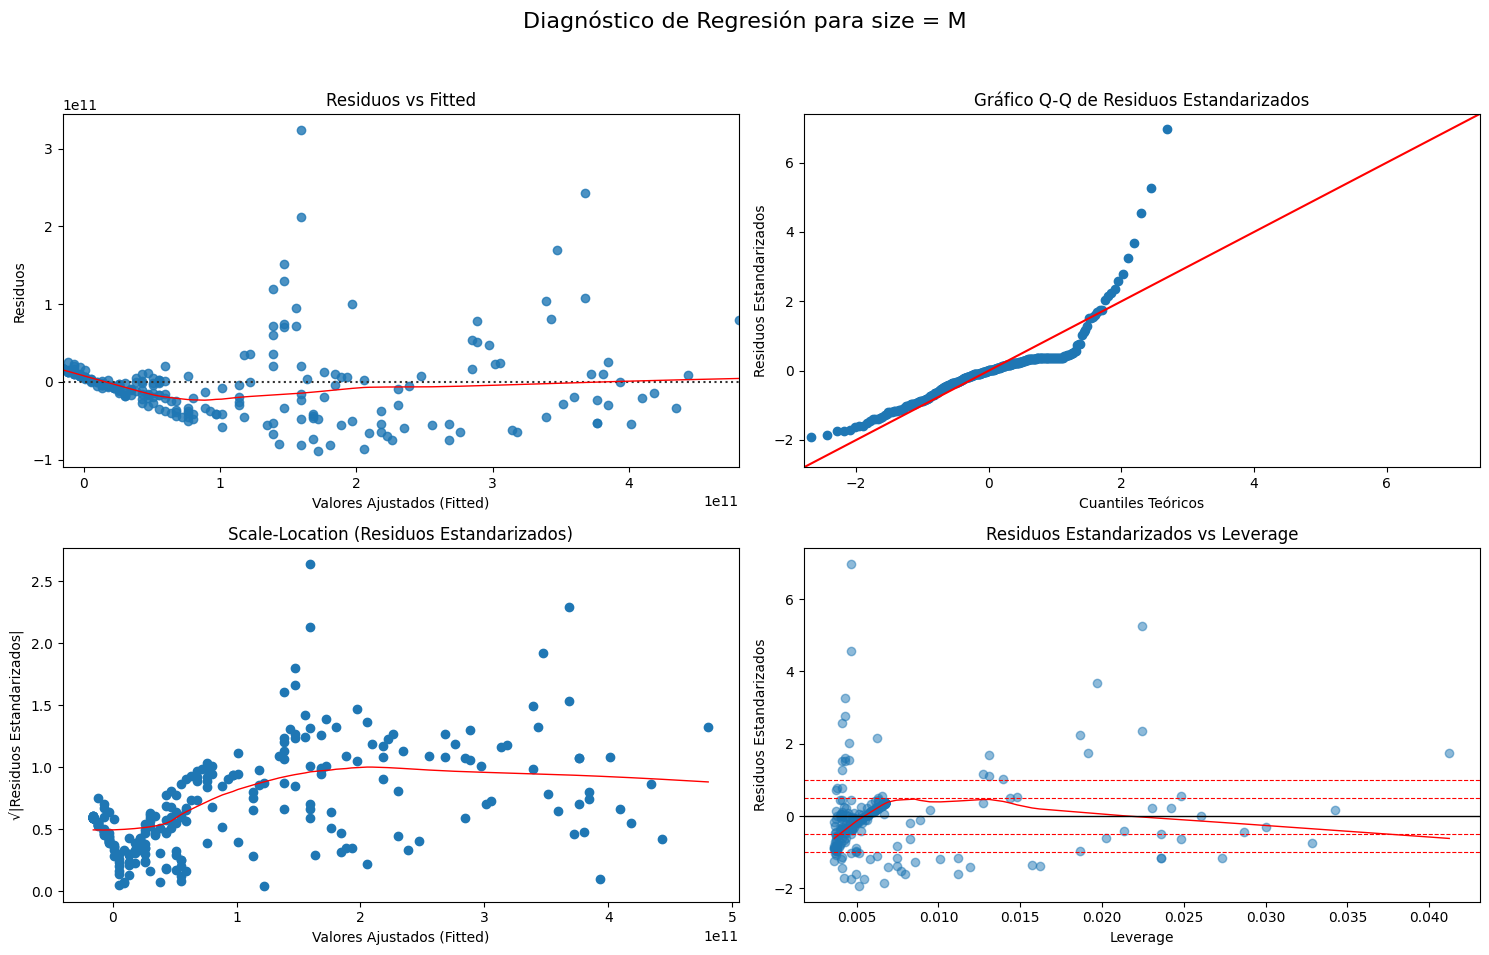

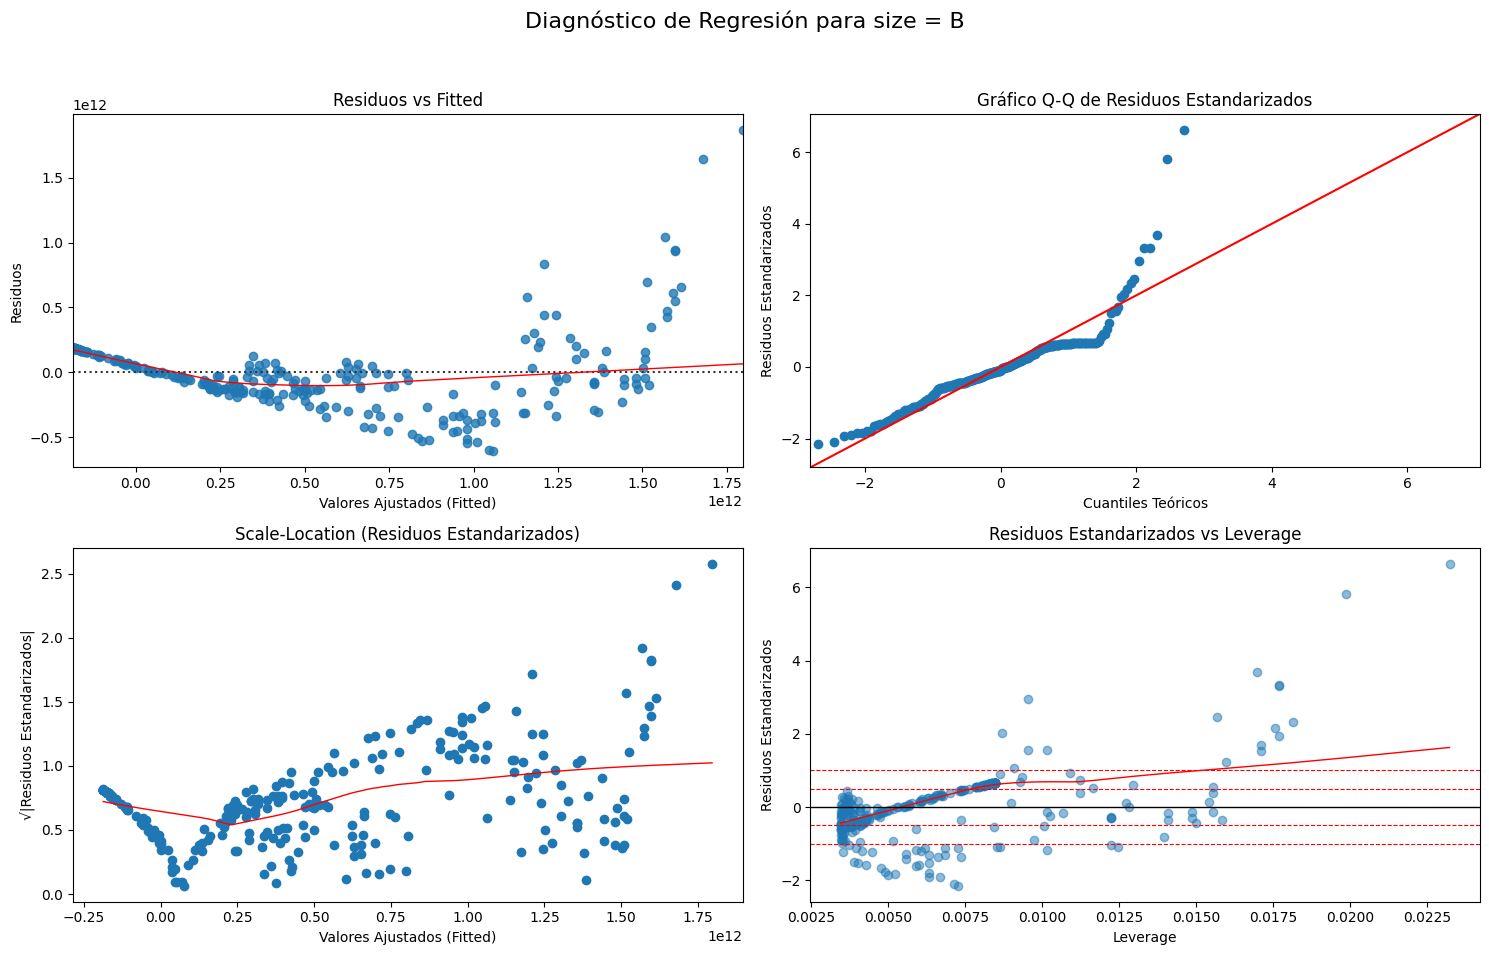

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


sizes = ['S', 'M', 'B']

for size in sizes:

    data_filtered = data[data['size'] == size]
    X = data_filtered[['diversity']]
    y = data_filtered['vol_total']


    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    residuals = y - predictions

    X_with_const = sm.add_constant(X)
    sm_model = sm.OLS(y, X_with_const).fit()
    sm_predictions = sm_model.predict(X_with_const)

    influence = sm_model.get_influence()
    standardized_residuals = influence.resid_studentized_internal

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Diagnóstico de Regresión para size = {size}', fontsize=16)

    sns.residplot(x=sm_predictions, y=residuals, lowess=True, ax=axs[0, 0],
                  line_kws={'color': 'red', 'lw': 1})
    axs[0, 0].set_title("Residuos vs Fitted")
    axs[0, 0].set_xlabel("Valores Ajustados (Fitted)")
    axs[0, 0].set_ylabel("Residuos")

    sm.qqplot(standardized_residuals, line='45', ax=axs[0, 1])
    axs[0, 1].set_title("Gráfico Q-Q de Residuos Estandarizados")
    axs[0, 1].set_xlabel("Cuantiles Teóricos")
    axs[0, 1].set_ylabel("Residuos Estandarizados")

    sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))
    axs[1, 0].scatter(sm_predictions, sqrt_standardized_residuals)
    sns.regplot(x=sm_predictions, y=sqrt_standardized_residuals, scatter=False, ci=None, lowess=True, ax=axs[1, 0], line_kws={'color': 'red', 'lw': 1})
    axs[1, 0].set_title("Scale-Location (Residuos Estandarizados)")
    axs[1, 0].set_xlabel("Valores Ajustados (Fitted)")
    axs[1, 0].set_ylabel("√|Residuos Estandarizados|")

    leverage = influence.hat_matrix_diag
    axs[1, 1].scatter(leverage, standardized_residuals, alpha=0.5)
    sns.regplot(x=leverage, y=standardized_residuals, scatter=False, ci=None, lowess=True, ax=axs[1, 1], line_kws={'color': 'red', 'lw': 1})
    axs[1, 1].set_title("Residuos Estandarizados vs Leverage")
    axs[1, 1].set_xlabel("Leverage")
    axs[1, 1].set_ylabel("Residuos Estandarizados")

    p = X.shape[1] + 1
    axs[1, 1].axhline(y=0, color='black', lw=1)
    for i in [0.5, 1]:
        axs[1, 1].axhline(y=i, linestyle='--', color='red', lw=0.8)
        axs[1, 1].axhline(y=-i, linestyle='--', color='red', lw=0.8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Esta evaluación sugiere que, aunque el modelo de regresión lineal ofrece un ajuste razonable para los grupos de países analizados, existen áreas que requieren atención adicional. La presencia de patrones y la heterocedasticidad destacan como factores a considerar para mejorar la calidad del modelo en el contexto de los países seleccionados.

Cabe mencionar que la interpretación de los gráficos se encuentra en la última entrega. Adjunto el enlace: https://docs.google.com/document/d/1KXAiSgFys6ozidQNCdywpm4dGL3pg3uGP3lQVV6xI80/edit?tab=t.0



A partir del análisis de datos y la verificación de los supuestos de una regresión lineal, concluimos que la relación entre la variable de diversificación y el total de exportaciones no sigue un comportamiento lineal. Sin embargo, es relevante destacar que la variable independiente aporta una gran capacidad explicativa sobre la variable dependiente. En el contexto de la macroeconomía, donde se valora más la capacidad explicativa que la precisión exacta del modelo, este hallazgo es significativo y respalda nuestra hipótesis inicial.